# Duplicates
To ensure that there are no duplicate images in our dataset, we will use an image hashing algorithm, like average hashing, difference hashing, or perceptual hashing, and calculate the hashes for each image. Once each image has its hash, we will use either the Hamming distance or cosine similarity value and a high similarity threshold to compare if any two images are the same. If two images are found to have a high similarity, we will visually investigate if the two images are duplicates. 

### Hashing 
Average hashing, difference hashing, and perceptual hashing are all techniques used for image similarity and identification, but they differ in how they generate a unique fingerprint for an image.

Average hashing involves reducing an image to a small size, typically 8x8 pixels, and then computing the average color value of each pixel. This results in a grayscale image that represents the overall visual structure of the original image. The resulting hash can be compared to other image hashes to determine similarity.

Difference hashing works similarly to average hashing, but instead of computing the average color value of each pixel, it computes the difference in color value between adjacent pixels. This results in an image that represents the edge structure of the original image. Like average hashing, the resulting hash can be compared to other image hashes to determine similarity.

Perceptual hashing takes a different approach, using computer vision techniques to identify perceptual features of an image that are likely to be distinctive and invariant to common image manipulations. These features might include color histograms, texture patterns, and edge orientation. The resulting hash is typically longer than those generated by average or difference hashing, but can be more robust to variations in lighting, cropping, and other factors.

In summary, average hashing and difference hashing are relatively simple techniques that generate short, compact hashes based on the overall visual structure or edge structure of an image, while perceptual hashing is a more sophisticated technique that uses computer vision to identify perceptually significant features of an image.

## Cosine similarity or hamming distance? 

If you are comparing two average hash values, you should use Hamming distance.

This is because average hash values are binary strings that represent the visual features of images in a simple format, where each bit represents whether a pixel is above or below the average brightness value. Therefore, Hamming distance is the most appropriate similarity measure to use for comparing average hash values, as it counts the number of bits that differ between the two hashes and gives a quantitative measure of the difference between the two images.

Cosine similarity, on the other hand, is more suitable for comparing vectors in multi-dimensional spaces, such as when comparing the frequency of words in text documents or the occurrence of features in images. While it is possible to convert the binary strings of average hash values into vectors and calculate their cosine similarity, this approach is less appropriate as it does not take into account the binary nature of the hash values and can lead to inaccurate similarity measures.

Therefore, to compare the similarity between two average hash values, you should use Hamming distance.

A threshold of 5 for the Hamming distance is relatively loose because it means that two hashes are considered similar if they differ by 5 bits or less out of the 64 bits (for the default hash size of 8). This means that the images can have a relatively high degree of difference and still be considered similar. However, the threshold should be set based on the specific application and the desired level of sensitivity to image similarity.

------

- The code block below computes the average hash for each image, then it compares each hash to every other has and uses the hamming distance with a threshold of 0 to decide if two images are exactly the same or not.

In [6]:
from PIL import Image
import os

# Define a function to compute the Hamming distance between two hashes.
def hamming_distance(hash1, hash2):
    # Compute the Hamming distance between two hashes.
    return sum(c1 != c2 for c1, c2 in zip(hash1, hash2))

# Define a function to compute the average hash of an image.
def average_hash(image, hash_size=8):
    # Resize the image to hash_size x hash_size pixels.
    image = image.resize((hash_size, hash_size), Image.ANTIALIAS)
    # Convert the image to grayscale.
    image = image.convert("L")
    # Compute the average pixel value.
    pixels = list(image.getdata())
    avg = sum(pixels) / len(pixels)
    # Compute the hash based on whether each pixel is above or below the average.
    bits = "".join(["1" if pixel > avg else "0" for pixel in pixels])
    return bits

# Set the path to the directory containing the subdirectories of images.
path = "/workspaces/Team-8-Machine-Learning/data"

# Create a dictionary to store the similar images.
similar_images = {}

# Create a list to store the image hashes.
hashes = []

# Count the number of images.
num_images = 0
for subdir, dirs, files in os.walk(path):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            num_images += 1

# Loop through all the subdirectories in the directory.
progress = 0
for subdir, dirs, files in os.walk(path):
    for filename in files:
        # Check if the file is an image file.
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Open the image file.
            image = Image.open(os.path.join(subdir, filename))
            # Compute the image's average hash.
            hash = average_hash(image)
            # Add the hash and file path to the list of hashes.
            hashes.append((hash, os.path.join(subdir, filename)))

            # Compare the hash of this image to all the previous images.
            for i in range(len(hashes)-1):
                # Compare the hashes of each pair of images using Hamming distance.
                distance = hamming_distance(hashes[i][0], hashes[-1][0])
                # Set a threshold for similarity (e.g., 5 bits or less difference).
                threshold = 0
                if distance <= threshold:
                    # If the two images are similar, add them to the similar_images dictionary.
                    if hashes[-1][1] not in similar_images:
                        similar_images[hashes[-1][1]] = [hashes[i][1]]
                    else:
                        similar_images[hashes[-1][1]].append(hashes[i][1])

                    if hashes[i][1] not in similar_images:
                        similar_images[hashes[i][1]] = [hashes[-1][1]]
                    else:
                        similar_images[hashes[i][1]].append(hashes[-1][1])
        
        # Print the percentage finished.
        progress += 1
        if progress % (num_images // 100) == 0:
            print(f"{int(progress * 100 / num_images)}% finished")

# Print the similar_images dictionary.
print(similar_images)


/tmp/ipykernel_15710/866530586.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((hash_size, hash_size), Image.ANTIALIAS)


0% finished
1% finished
2% finished
3% finished
4% finished
5% finished
6% finished
7% finished
8% finished
9% finished
10% finished
11% finished
12% finished
13% finished
14% finished
15% finished
16% finished
17% finished
18% finished
19% finished
20% finished
21% finished
22% finished
23% finished
24% finished
25% finished
26% finished
27% finished
28% finished
29% finished
30% finished
31% finished
32% finished
33% finished
34% finished
35% finished
36% finished
37% finished
38% finished
39% finished
40% finished
41% finished
42% finished
43% finished
44% finished
45% finished
46% finished
47% finished
48% finished
49% finished
50% finished
51% finished
52% finished
53% finished
54% finished
55% finished
56% finished
57% finished
58% finished
59% finished
60% finished
61% finished
62% finished
63% finished
64% finished
65% finished
66% finished
67% finished
68% finished
69% finished
70% finished
71% finished
72% finished
73% finished
74% finished
75% finished
76% finished
77% finis

- The code block below converts the dictionary to a CSV for easier access with pandas.

In [35]:
import csv

with open('dict_of_similar_images.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for key, value in similar_images.items():
        writer.writerow([key, value])


In [2]:
import pandas as pd

similar_images_df = pd.read_csv('/workspaces/Team-8-Machine-Learning-1/preprocessing/dict_of_similar_images.csv')

similar_images_df.columns = ['image_1', 'image_2']

In [3]:
len(similar_images_df)/2

1917.0

In [3]:
# Normalize the file paths
import os 
similar_images_df['image_1'] = similar_images_df['image_1'].apply(os.path.normpath)
similar_images_df['image_2'] = similar_images_df['image_2'].apply(os.path.normpath)

- In the 2 code blocks below, I am extracting the emotion tagged to the image from the path in order to evaluate how often two images that are judged to be duplicates have the same tagged emotion.

In [4]:
import pandas as pd

similar_images_df['image_1_emotion'] = None
similar_images_df['image_2_emotion'] = None


# define the folder you want to extract characters after
target_folder = '/workspaces/Team-8-Machine-Learning/data/train/'


for index, row in similar_images_df.iterrows():
    path = row['image_1']
    if target_folder in path:
        parts = path.split(target_folder)
        if len(parts) > 1:
            new_path = parts[1].split('/')[0]
            similar_images_df.at[index, 'image_1_emotion'] = new_path


for index, row in similar_images_df.iterrows():
    path = row['image_2']
    if target_folder in path:
        parts = path.split(target_folder)
        if len(parts) > 1:
            new_path = parts[1].split('/')[0]
            similar_images_df.at[index, 'image_2_emotion'] = new_path

In [5]:
target_folder = '/workspaces/Team-8-Machine-Learning/data/test/'


for index, row in similar_images_df.iterrows():
    path = row['image_1']
    if target_folder in path:
        parts = path.split(target_folder)
        if len(parts) > 1:
            new_path = parts[1].split('/')[0]
            similar_images_df.at[index, 'image_1_emotion'] = new_path


for index, row in similar_images_df.iterrows():
    path = row['image_2']
    if target_folder in path:
        parts = path.split(target_folder)
        if len(parts) > 1:
            new_path = parts[1].split('/')[0]
            similar_images_df.at[index, 'image_2_emotion'] = new_path

In [11]:
similar_images_df['image_1'].head(1)

0    /workspaces/Team-8-Machine-Learning/data/train...
Name: image_1, dtype: object

In [ ]:
/workspaces/Team-8-Machine-Learning-1/data/test/neutral/PrivateTest_59059.jpg

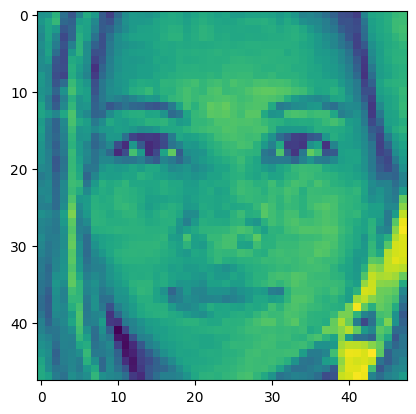

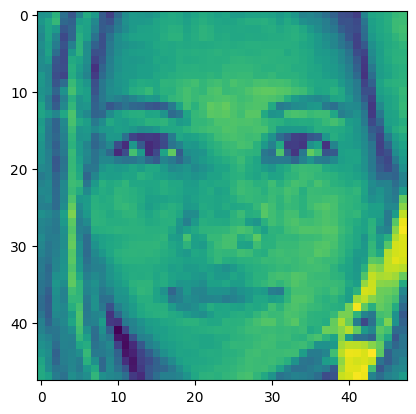

In [13]:
#show image at a specific path
from PIL import Image
import matplotlib.pyplot as plt
import os

def show_image(path):
    image = Image.open(path)
    plt.imshow(image)
    plt.show()

show_image('/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_87946315.jpg')

show_image('/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_54214241.jpg')

In [4]:
#filter out every 2nd row in a dataframe
similar_images_df_even = similar_images_df[similar_images_df.index % 2 == 0]


In [ ]:
#compare 

In [25]:
count_non_agree_emotions = len(similar_images_df[similar_images_df['image_1_emotion'] != similar_images_df['image_2_emotion']])/2
print(f'count of images that are called duplicates but have different emotions: {count_non_agree_emotions} ')

count of images that are called duplicates but have different emotions: 127.0 


In [26]:
count_agree_emotions = len(similar_images_df[similar_images_df['image_1_emotion'] == similar_images_df['image_2_emotion']])/2
print(f'count of images that are called duplicates and have the same emotions: {count_agree_emotions} ')

count of images that are called duplicates and have the same emotions: 1790.0 


## Recommendation

- Be safe and delete duplicates computed by this method.

In [22]:
import os
import shutil
import pandas as pd

# Read in the data frame containing the duplicate image paths
df = similar_images_df_even['image_1']

# Create a list of unique folder paths from the extracted folder names
folders = []
for folder in ['test', 'train']:
    for emotion in ['angry', 'sad', 'happy', 'surprise', 'neutral', 'disgust', 'fear']:
        folder_path = os.path.join('data', folder, emotion) # modify path structure
        if os.path.exists(folder_path):
            folders.append(folder_path)

# Iterate through each unique folder path and create a new folder with the same subdirectories
for folder in folders:
    new_folder = folder.replace('original', 'processed') # Replace 'original' with 'processed' in the folder name
    new_folder_parent = os.path.join(os.path.dirname(folder), new_folder) # Create parent directory
    os.makedirs(new_folder_parent, exist_ok=True) # Create the new parent directory if it does not exist
    os.makedirs(new_folder, exist_ok=True) # Create the new folder if it does not exist

    # Iterate through each file in the folder and copy it to the new folder if it is not a duplicate
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file not in df['file'].values:
                old_path = os.path.join(root, file)
                new_path = os.path.join(new_folder, os.path.basename(os.path.dirname(root)), file) # modify path structure
                os.makedirs(os.path.dirname(new_path), exist_ok=True) # Create subdirectories for emotion
                shutil.copy(old_path, new_path)



In [23]:
import os
import shutil
import pandas as pd

# Read in the data frame containing the duplicate image paths
df = similar_images_df_even['image_1']

# Create a list of unique folder paths from the extracted folder names
folders = []
for folder in ['test', 'train']:
    for emotion in ['angry', 'sad', 'happy', 'surprise', 'neutral', 'disgust', 'fear']:
        folder_path = os.path.join('data', folder, emotion) # modify path structure
        if os.path.exists(folder_path):
            folders.append(folder_path)

# Iterate through each unique folder path and create a new folder with the same subdirectories
for folder in folders:
    new_folder = folder.replace(folder.split("/")[-2], f"{folder.split('/')[-2]}_processed") # Replace the emotion folder with emotion_processed
    new_folder_parent = os.path.join(os.path.dirname(folder), new_folder) # Create parent directory
    os.makedirs(new_folder_parent, exist_ok=True) # Create the new parent directory if it does not exist
    os.makedirs(new_folder, exist_ok=True) # Create the new folder if it does not exist

    # Iterate through each file in the folder and copy it to the new folder if it is not a duplicate
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file not in df.values:
                old_path = os.path.join(root, file)
                new_path = os.path.join(new_folder, os.path.basename(os.path.dirname(root)), file) # modify path structure
                os.makedirs(os.path.dirname(new_path), exist_ok=True) # Create subdirectories for emotion
                shutil.copy(old_path, new_path)



In [25]:
pd.set_option('display.max_colwidth', None)
df

0       /workspaces/Team-8-Machine-Learning/data/train/neutral/Training_54214241.jpg
2       /workspaces/Team-8-Machine-Learning/data/train/neutral/Training_87996163.jpg
4       /workspaces/Team-8-Machine-Learning/data/train/neutral/Training_15565475.jpg
6       /workspaces/Team-8-Machine-Learning/data/train/neutral/Training_46781266.jpg
8       /workspaces/Team-8-Machine-Learning/data/train/neutral/Training_80057149.jpg
                                            ...                                     
3824     /workspaces/Team-8-Machine-Learning/data/test/angry/PublicTest_78810808.jpg
3826     /workspaces/Team-8-Machine-Learning/data/test/angry/PublicTest_65705281.jpg
3828    /workspaces/Team-8-Machine-Learning/data/test/angry/PrivateTest_39402661.jpg
3830      /workspaces/Team-8-Machine-Learning/data/test/fear/PublicTest_11067233.jpg
3832     /workspaces/Team-8-Machine-Learning/data/test/angry/PublicTest_96104154.jpg
Name: image_1, Length: 1917, dtype: object

In [15]:
import os
import pandas as pd

# Set the root directory
root_dir = "/workspaces/Team-8-Machine-Learning-1/data"

# Create a list to store all file paths
file_paths = []

# Iterate through all files and folders under the root directory
for root, dirs, files in os.walk(root_dir):
    # Iterate through all files in the current directory
    for file in files:
        # Append the file path to the list
        file_paths.append(os.path.join(root, file))

# Create a dataframe from the list of file paths
df = pd.DataFrame({'file_path': file_paths})


In [32]:
df

,file_path
0,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_81019318.jpg
1,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_92711424.jpg
2,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_9807452.jpg
3,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_93353638.jpg
4,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_82919657.jpg
...,...
36335,/workspaces/Team-8-Machine-Learning-1/data/test/angry/PublicTest_84366.jpg
36336,/workspaces/Team-8-Machine-Learning-1/data/test/angry/PrivateTest_95380145.jpg
36337,/workspaces/Team-8-Machine-Learning-1/data/test/angry/PrivateTest_43537573.jpg
36338,/workspaces/Team-8-Machine-Learning-1/data/test/angry/PrivateTest_42348080.jpg


In [5]:
unique_paths = df[~df['file_path'].isin(similar_images_df_even['image_1'])]


NameError: name 'df' is not defined

In [6]:
similar_images_df_even

,image_1,image_2
0,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...
2,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...
4,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...
6,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...
8,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...
...,...,...
3824,/workspaces/Team-8-Machine-Learning/data/test/...,['/workspaces/Team-8-Machine-Learning/data/tra...
3826,/workspaces/Team-8-Machine-Learning/data/test/...,['/workspaces/Team-8-Machine-Learning/data/tes...
3828,/workspaces/Team-8-Machine-Learning/data/test/...,['/workspaces/Team-8-Machine-Learning/data/tra...
3830,/workspaces/Team-8-Machine-Learning/data/test/...,['/workspaces/Team-8-Machine-Learning/data/tes...


In [7]:
import os
import pandas as pd

# Set the directory containing the images
image_dir = "/workspaces/Team-8-Machine-Learning-1/data_processed/"

# Read the dataframe with the list of images to delete


# Loop over each row in the dataframe
for index, row in similar_images_df_even.iterrows():
    # Get the full path of the image to delete
    image_path = os.path.join(image_dir, row["image_1"])

    # Check if the image file exists
    if os.path.isfile(image_path):
        # Delete the image file
        os.remove(image_path)
        print(f"Deleted image: {image_path}")


In [34]:
unique_paths - 

,file_path
0,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_81019318.jpg
1,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_92711424.jpg
2,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_9807452.jpg
3,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_93353638.jpg
4,/workspaces/Team-8-Machine-Learning-1/data/train/neutral/Training_82919657.jpg
...,...
36335,/workspaces/Team-8-Machine-Learning-1/data/test/angry/PublicTest_84366.jpg
36336,/workspaces/Team-8-Machine-Learning-1/data/test/angry/PrivateTest_95380145.jpg
36337,/workspaces/Team-8-Machine-Learning-1/data/test/angry/PrivateTest_43537573.jpg
36338,/workspaces/Team-8-Machine-Learning-1/data/test/angry/PrivateTest_42348080.jpg


In [36]:
# Loop through the dataframe and move each file to the corresponding directory in data_processed
for idx, row in unique_paths.iterrows():
    old_path = row['file_path']
    new_path = old_path.replace('data/', 'data_processed/')
    new_folder = os.path.dirname(new_path)
    os.makedirs(new_folder, exist_ok=True)
    shutil.copy(old_path, new_path)

In [6]:
similar_images_df_

,image_1,image_2,image_1_emotion,image_2_emotion
0,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...,neutral,neutral
1,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...,neutral,neutral
2,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...,neutral,neutral
3,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...,neutral,neutral
4,/workspaces/Team-8-Machine-Learning/data/train...,['/workspaces/Team-8-Machine-Learning/data/tra...,neutral,neutral
...,...,...,...,...
3829,/workspaces/Team-8-Machine-Learning/data/test/...,['/workspaces/Team-8-Machine-Learning/data/tes...,angry,fear
3830,/workspaces/Team-8-Machine-Learning/data/test/...,['/workspaces/Team-8-Machine-Learning/data/tes...,fear,angry
3831,/workspaces/Team-8-Machine-Learning/data/test/...,['/workspaces/Team-8-Machine-Learning/data/tes...,angry,angry
3832,/workspaces/Team-8-Machine-Learning/data/test/...,['/workspaces/Team-8-Machine-Learning/data/tes...,angry,angry


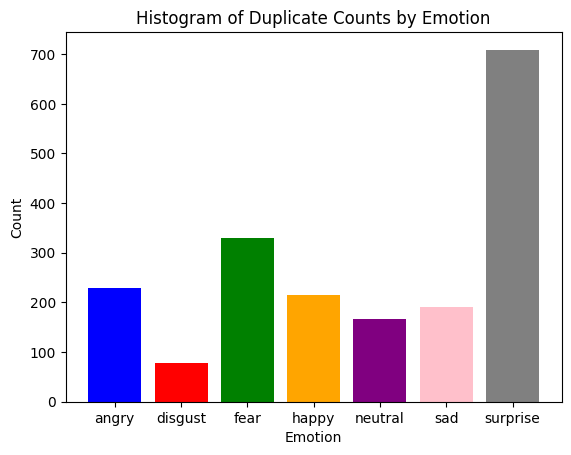

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

colors = ['blue', 'red', 'green', 'orange', 'purple', 'pink', 'gray']

# group the dataframe by emotion and count the number of occurrences of each
counts = similar_images_df_even.groupby('image_1_emotion').size()

# plot a histogram of the counts
plt.bar(counts.index, counts.values, color=colors[:len(counts)])

# set the plot title and axis labels
plt.title('Histogram of Duplicate Counts by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')

# display the plot
plt.show()


In [16]:
df

,file_path
0,/workspaces/Team-8-Machine-Learning-1/data/tra...
1,/workspaces/Team-8-Machine-Learning-1/data/tra...
2,/workspaces/Team-8-Machine-Learning-1/data/tra...
3,/workspaces/Team-8-Machine-Learning-1/data/tra...
4,/workspaces/Team-8-Machine-Learning-1/data/tra...
...,...
36335,/workspaces/Team-8-Machine-Learning-1/data/tes...
36336,/workspaces/Team-8-Machine-Learning-1/data/tes...
36337,/workspaces/Team-8-Machine-Learning-1/data/tes...
36338,/workspaces/Team-8-Machine-Learning-1/data/tes...


In [21]:
target_folder = '/workspaces/Team-8-Machine-Learning/data/test/'


for index, row in df.iterrows():
    path = row['file_path']
    if target_folder in path:
        parts = path.split(target_folder)
        if len(parts) > 1:
            new_path = parts[1].split('/')[0]
            df.at[index, 'image_1_emotion'] = new_path


for index, row in df.iterrows():
    path = row['file_path']
    if target_folder in path:
        parts = path.split(target_folder)
        if len(parts) > 1:
            new_path = parts[1].split('/')[0]
            df.at[index, 'image_2_emotion'] = new_path

In [22]:
df


,file_path
0,/workspaces/Team-8-Machine-Learning-1/data/tra...
1,/workspaces/Team-8-Machine-Learning-1/data/tra...
2,/workspaces/Team-8-Machine-Learning-1/data/tra...
3,/workspaces/Team-8-Machine-Learning-1/data/tra...
4,/workspaces/Team-8-Machine-Learning-1/data/tra...
...,...
36335,/workspaces/Team-8-Machine-Learning-1/data/tes...
36336,/workspaces/Team-8-Machine-Learning-1/data/tes...
36337,/workspaces/Team-8-Machine-Learning-1/data/tes...
36338,/workspaces/Team-8-Machine-Learning-1/data/tes...


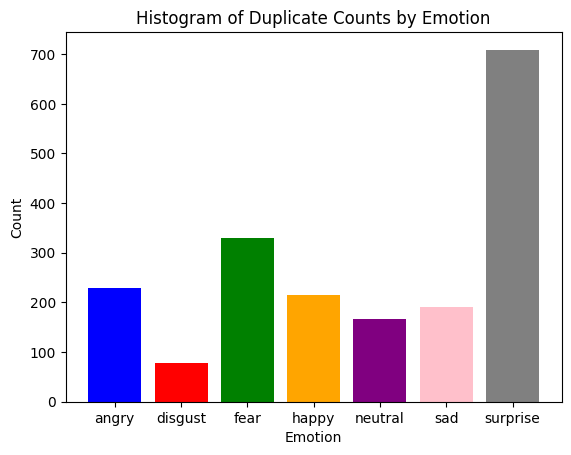

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

colors = ['blue', 'red', 'green', 'orange', 'purple', 'pink', 'gray']

# group the dataframe by emotion and count the number of occurrences of each
counts = df.groupby('image_1_emotion').size()

# plot a histogram of the counts
plt.bar(counts.index, counts.values, color=colors[:len(counts)])

# set the plot title and axis labels
plt.title('Histogram of Duplicate Counts by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')

# display the plot
plt.show()

In [25]:
#create a dataframe of image paths

import pandas as pd
import os

# set the directory containing the images
image_dir = '/workspaces/Team-8-Machine-Learning-1/data_processed/test/'

# get a list of all the image filenames in the directory
image_files = os.listdir(image_dir)

# create a dataframe with a column for the image paths
df = pd.DataFrame({'image_path': [os.path.join(image_dir, f) for f in image_files]})

# print the dataframe
print(df)


                                          image_path
0  /workspaces/Team-8-Machine-Learning-1/data_pro...
1  /workspaces/Team-8-Machine-Learning-1/data_pro...
2  /workspaces/Team-8-Machine-Learning-1/data_pro...
3  /workspaces/Team-8-Machine-Learning-1/data_pro...
4  /workspaces/Team-8-Machine-Learning-1/data_pro...
5  /workspaces/Team-8-Machine-Learning-1/data_pro...
6  /workspaces/Team-8-Machine-Learning-1/data_pro...


In [27]:
import pandas as pd
import os

# set the directory containing the images
image_dir = '/workspaces/Team-8-Machine-Learning-1/data/'

# create an empty list to store the image paths
image_paths = []

# traverse all subdirectories of the image directory using os.walk()
for root, dirs, files in os.walk(image_dir):
    for file in files:
        # check if the file is an image file
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            # add the full path of the image file to the list
            image_paths.append(os.path.join(root, file))

# create a dataframe with a column for the image paths
df = pd.DataFrame({'image_path': image_paths})

# print the dataframe
print(df)

                                              image_path
0      /workspaces/Team-8-Machine-Learning-1/data/tra...
1      /workspaces/Team-8-Machine-Learning-1/data/tra...
2      /workspaces/Team-8-Machine-Learning-1/data/tra...
3      /workspaces/Team-8-Machine-Learning-1/data/tra...
4      /workspaces/Team-8-Machine-Learning-1/data/tra...
...                                                  ...
36335  /workspaces/Team-8-Machine-Learning-1/data/tes...
36336  /workspaces/Team-8-Machine-Learning-1/data/tes...
36337  /workspaces/Team-8-Machine-Learning-1/data/tes...
36338  /workspaces/Team-8-Machine-Learning-1/data/tes...
36339  /workspaces/Team-8-Machine-Learning-1/data/tes...

[36340 rows x 1 columns]


In [31]:
import pandas as pd
import os

# set the directory containing the images
image_dir = '/workspaces/Team-8-Machine-Learning-1/data_processed/'

# create an empty list to store the image paths
image_paths = []

# traverse all subdirectories of the image directory using os.walk()
for root, dirs, files in os.walk(image_dir):
    for file in files:
        # check if the file is an image file
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            # add the full path of the image file to the list
            image_paths.append(os.path.join(root, file))

# create a dataframe with a column for the image paths
df = pd.DataFrame({'image_path': image_paths})

# print the dataframe
print(df)


                                              image_path
0      /workspaces/Team-8-Machine-Learning-1/data_pro...
1      /workspaces/Team-8-Machine-Learning-1/data_pro...
2      /workspaces/Team-8-Machine-Learning-1/data_pro...
3      /workspaces/Team-8-Machine-Learning-1/data_pro...
4      /workspaces/Team-8-Machine-Learning-1/data_pro...
...                                                  ...
36335  /workspaces/Team-8-Machine-Learning-1/data_pro...
36336  /workspaces/Team-8-Machine-Learning-1/data_pro...
36337  /workspaces/Team-8-Machine-Learning-1/data_pro...
36338  /workspaces/Team-8-Machine-Learning-1/data_pro...
36339  /workspaces/Team-8-Machine-Learning-1/data_pro...

[36340 rows x 1 columns]
